In [1]:
import os
import re
import numpy as np
import json
from nltk.tokenize import word_tokenize, sent_tokenize
import seaborn as sns

In [2]:
def visualize(text, enter_idx):
    c = 0
    prev = -1
    new_text = ''
    for i in enter_idx:
        new_text += text[prev+1:i]
        new_text += "\n"
        prev = i
    return new_text

In [11]:
def read_dataset(path="dataset"):
    with open(f"{path}/corpus.txt") as f:
        texts = f.read().split("\n\n")
    
    with open(f"{path}/annotation.json") as f:
        annot = json.load(f)
    assert len(annot) == len(texts)
    return texts, annot

In [12]:
corpus, annot = read_dataset()

In [13]:
len(annot)

1160

In [20]:
print(sum([len(x) for x in corpus]))

6297985


In [47]:
doc_len = [len(word_tokenize(x)) for x in corpus]
print(np.mean(doc_len), np.std(doc_len))

797.5560344827586 531.6157936259518


In [48]:
sum(doc_len)

925165

In [17]:
print(sum([len(x["carriage_idx"]) for x in annot]))

12659


## Sentence per paragraph in one article

In [67]:
#list(map(lambda x: len(x), art_seg_sent))
sent_per_parag = list(map(lambda x: [len(y) for y in x], art_seg_sent))

In [68]:
spp = list(map(lambda x: sum(x)/len(x), sent_per_parag))

In [71]:
print(np.mean(spp), np.std(spp) )

3.2322135451755445 2.450452806890648


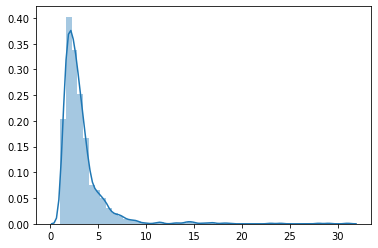

In [70]:
sns.distplot(spp, )

## Sentences and words distribution in paragraph

In [10]:
seg_sents = list(map(lambda x: sent_tokenize(x), segments))
seg_words = list(map(lambda x: word_tokenize(x), segments))

In [11]:
sent_per_parag = list(map(lambda x: len(x), seg_sents))
word_per_parag = list(map(lambda x: len(x), seg_words))

In [107]:
sns.distplot(sent_per_parag, )

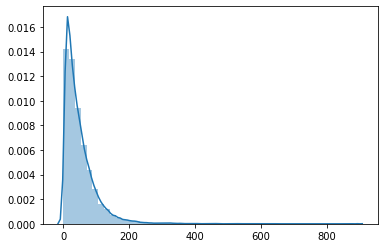

In [14]:
sns.distplot(word_per_parag, )